<h1 style="text-align:center; font-size:24">
BIOCB 4381/6381 Final Project<br>
</h1>

<h5 style="text-align:center">
Lingyu Zhou (lz568)<br>
</h5>

<div style="background-color: #fffee8; border-color: #f6f4c7; border-left: 5px solid #f6f4c7; padding: 1.5em; color: #403f30">
 
#### Please comment your code wherever you feel necessary. You are free to add new cells to solve problems or test your code. Good luck!
                                                                               
<div/>

### Modules that you may need in Part 1

In [2]:
import os
import sys
import copy
import traceback
import re
import pandas as pd
import numpy as np
from Bio import SeqIO

from collections import Counter

<h3 style="background-color: #daebff; border-color: #bad5f6; border-left: 5px solid #bad5f6; padding: 1.5em; color: #6f89a9">
Part 1: Clone-seq
</h3>

### (a) Parse single row from a SAM file

In [3]:
def parse_sam_row(row, headers):
    """
    Parse a single row from alignment section in SAM file to a dictionary
    Args:
        row [str]: a row from the alignment section of a SAM file
        headers [list]: names of 11 mandatory SAM fields
    Returns:
        sam_dict [dict]: maps names of 11 mandatory fields to corresponding values
    """
    ### YOUR SOLUTION STARTS HERE ###
    sam_dict={}
    for i in range(len(headers)):
        sam_dict[headers[i]]=row.split("\t")[i]
    return sam_dict
    ### YOUR SOLUTION ENDS HERE ###

In [4]:
# test case
with open('./data/test_sam_row.txt', 'r') as f: 
    test_row = f.readlines()

headers = ["QNAME", "FLAG", "RNAME", "POS", "MAPQ", "CIGAR", "RNEXT", "PNEXT", "TLEN", "SEQ", "QUAL"]
parse_sam_row(test_row[0].strip(), headers)

{'QNAME': 'HWI-ST397:389:C42DEACXX:8:1101:1161:8228',
 'FLAG': '0',
 'RNAME': '7696',
 'POS': '1149',
 'MAPQ': '60',
 'CIGAR': '29S72M',
 'RNEXT': '*',
 'PNEXT': '0',
 'TLEN': '0',
 'SEQ': 'GAGGTNNNNNNNNNNNNNNNNNNNNNNNNAAAGNATGATCAGGGAGTGGAACCTTAGCTCGAGCCCGCAGATGACCTGGATGGAGGCACGGAGGAGCAGGG',
 'QUAL': '<<<?@########################-0<=#0<=?????????=???????????@@??===<<<<<<====<=<<<==<=<<<<<::6:95<<8<<6'}

In [5]:
with open("./data/Clone_Seq_Aligned.sam", 'r') as sam_file:sam_lines = sam_file.readlines()
sam_lines[0:20]

['@SQ\tSN:7696\tLN:1602\n',
 '@SQ\tSN:13668\tLN:981\n',
 '@SQ\tSN:5174\tLN:1281\n',
 '@SQ\tSN:8833\tLN:1338\n',
 '@SQ\tSN:8522\tLN:996\n',
 '@SQ\tSN:9938\tLN:888\n',
 '@SQ\tSN:10062\tLN:1494\n',
 '@SQ\tSN:1136\tLN:477\n',
 '@SQ\tSN:8593\tLN:1503\n',
 '@SQ\tSN:8466\tLN:1038\n',
 '@SQ\tSN:7540\tLN:300\n',
 '@SQ\tSN:12438\tLN:1251\n',
 '@SQ\tSN:6936\tLN:1023\n',
 '@SQ\tSN:804\tLN:669\n',
 '@PG\tID:bwa\tPN:bwa\tVN:0.7.12-r1039\tCL:bwa mem Gene_Refs.fasta Clone_Seq.fastq\n',
 'HWI-ST397:389:C42DEACXX:8:1101:1161:8228\t0\t7696\t1149\t60\t29S72M\t*\t0\t0\tGAGGTNNNNNNNNNNNNNNNNNNNNNNNNAAAGNATGATCAGGGAGTGGAACCTTAGCTCGAGCCCGCAGATGACCTGGATGGAGGCACGGAGGAGCAGGG\t<<<?@########################-0<=#0<=?????????=???????????@@??===<<<<<<====<=<<<==<=<<<<<::6:95<<8<<6\tNM:i:2\tMD:Z:4T20G46\tAS:i:65\tXS:i:0\n',
 'HWI-ST397:389:C42DEACXX:8:1101:19784:8212\t0\t7696\t962\t60\t71M\t*\t0\t0\tAAAGGAGAAAAGAAATTGCCCAGAAGGCAGCAGAGGAAAATGAGAGATACCGGAAGGAGATGGAACAGATT\tCCCFFFFFHHHHHJJJJIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ

### (b) Parse SAM file

In [6]:
def parse_sam_file(fname, headers, int_cols):
    """
    Parse a SAM file to a dictionary
    Args:
        fname [str]: path of the SAM file
        headers [list]: names of 11 mandatory SAM fields
        int_cols [list]: names of fields that should be treated as integers
    Returns:
        sam_df [pandas.DataFrame]: a data frame of the parsed SAM file, where each column corresponds to a field
    """
    
    ### YOUR SOLUTION STARTS HERE ###
    with open(fname, 'r') as sam_file:lines = sam_file.readlines()
    df={}
    cont=lines[11+4:]
    for i in range(len(cont)):
        df[i]=parse_sam_row(cont[i],headers)
    
    df=pd.DataFrame(df)
    df=df.T

    df[int_cols]=df[int_cols].astype(int)
    sam_df=df
    return sam_df
    
    ### YOUR SOLUTION ENDS HERE ###

In [7]:
# df=parse_sam_file("./data/Clone_Seq_Aligned.sam",["QNAME", "FLAG", "RNAME", "POS", "MAPQ", "CIGAR", "RNEXT", "PNEXT", "TLEN", "SEQ", "QUAL"],[])
# df

### (c) Load Clone-seq alignment data

In [8]:
### YOUR SOLUTION HERE ###
df_clone_seq=parse_sam_file("./data/Clone_Seq_Aligned.sam",\
               ["QNAME", "FLAG", "RNAME", "POS", "MAPQ", "CIGAR", "RNEXT", "PNEXT", "TLEN", "SEQ", "QUAL"],\
               ["FLAG", "POS", "MAPQ", "PNEXT","TLEN"]) 
df_clone_seq.head()

,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,TLEN,SEQ,QUAL
0,HWI-ST397:389:C42DEACXX:8:1101:1161:8228,0,7696,1149,60,29S72M,*,0,0,GAGGTNNNNNNNNNNNNNNNNNNNNNNNNAAAGNATGATCAGGGAG...,<<<?@########################-0<=#0<=?????????...
1,HWI-ST397:389:C42DEACXX:8:1101:19784:8212,0,7696,962,60,71M,*,0,0,AAAGGAGAAAAGAAATTGCCCAGAAGGCAGCAGAGGAAAATGAGAG...,CCCFFFFFHHHHHJJJJIJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...
2,HWI-ST397:389:C42DEACXX:8:1101:13264:8455,0,7696,127,60,101M,*,0,0,GTGGGAGACCTGAAGCTGGTCATCAATGAACCCAGCCGTCTGCCTC...,DDDDDDDDDDDDDDDDDDDEDEDCC@DDBADDDDDDDEDFFFHHHH...
3,HWI-ST397:389:C42DEACXX:8:1101:19899:12747,0,7696,1276,60,71M,*,0,0,CCAGAGCAGATCATGGGGAAGGATGTCCGGCTCCTACGCATCAAGA...,CCCFFFFFHHHHHJJJJJJJJJIIJJJJJJJJJJJJJJJJIIJJJJ...
4,HWI-ST397:389:C42DEACXX:8:1101:19165:15788,0,7696,1291,60,101M,*,0,0,GGGAAGGATGTCCGGCTCCTACGCATCAAGAAGGAGGGATCCTTAG...,CCCFFFFFHHHHHJJJJIJJIJIJJJJJJJJIIHIJJJJIJJFIJJ...


In [9]:
(df_clone_seq["RNAME"]).value_counts(dropna=False)

8522     10920
*         8859
12438     6048
8833      5740
7696      4555
5174      1997
8593      1174
9938       982
10062      830
804        544
1136       537
8466       386
6936       340
13668      229
7540       148
Name: RNAME, dtype: int64

In [10]:
# filtering
df_clone_seq=df_clone_seq[df_clone_seq["RNAME"]!="*"]

In [11]:
# filtering
df_clone_seq=df_clone_seq[df_clone_seq["FLAG"]==0]

### (d) Generate descriptive variables

1. *tot_alignments* - The total number of reads left after filtering
2. *num_refs* - The number of unique references aligned to across all your reads
3. *reads_per_ref* - A dictionary mapping unique reference IDs to the number of reads aligned to that reference
4. *average_quality* - The average mapping quality for all reads left after filtering

In [12]:
### YOUR SOLUTION STARTS HERE ###
# tot_alignments
tot_alignments=len(df_clone_seq)
tot_alignments

34403

In [13]:
# num_refs
num_refs=len(df_clone_seq["RNAME"].unique())
num_refs

14

In [14]:
# reads_per_ref
from pandasql import sqldf
reads_per_df=dict(zip(sqldf("select RNAME,count(QNAME) as COUNT from df_clone_seq group by RNAME")["RNAME"],\
                      sqldf("select RNAME,count(QNAME) as COUNT from df_clone_seq group by RNAME")["COUNT"]))
reads_per_df

{'10062': 830,
 '1136': 535,
 '12438': 6040,
 '13668': 229,
 '5174': 1997,
 '6936': 340,
 '7540': 148,
 '7696': 4554,
 '804': 544,
 '8466': 386,
 '8522': 10919,
 '8593': 1174,
 '8833': 5725,
 '9938': 982}

In [15]:
# average_quality

average_quality=sum(df_clone_seq["MAPQ"])/len(df_clone_seq["MAPQ"])
average_quality

59.98145510565939

### (e) Nucleotide position counts for single read

In [16]:
def pos_nucl_count(seq, pos):
    """
    Get counts of A,T,C,G at each position along the sequence
    Args:
        seq [str]: a sequence string (from SEQ field in SAM)
        pos [int]: the position index describing the left-most aligning place
    Returns:
        pos_count_dict [dict]: maps each position index to counts of A,T,C,G at that position
    """
    ### YOUR SOLUTION STARTS HERE ###
    pos_count_dict={}
    for i in range(len(seq)):
        pos_count_dict[pos+i]={"A":0 , "T":0, "C":0, "G":0}
        if seq[i] in ['A', 'T', 'C', 'G']: # ignore N
            pos_count_dict[pos+i][seq[i]]+=1
    
    return pos_count_dict

    
    ### YOUR SOLUTION ENDS HERE ###

In [17]:
# test case 1: using the example in the instruction

pos_nucl_count('CCGA', 4)

{4: {'A': 0, 'T': 0, 'C': 1, 'G': 0},
 5: {'A': 0, 'T': 0, 'C': 1, 'G': 0},
 6: {'A': 0, 'T': 0, 'C': 0, 'G': 1},
 7: {'A': 1, 'T': 0, 'C': 0, 'G': 0}}

In [18]:
# test case 2: using the first entry in df_clone_seq
record = df_clone_seq.iloc[0]

count_dict = pos_nucl_count(record['SEQ'], record['POS'])

In [19]:
count_dict

{1149: {'A': 0, 'T': 0, 'C': 0, 'G': 1},
 1150: {'A': 1, 'T': 0, 'C': 0, 'G': 0},
 1151: {'A': 0, 'T': 0, 'C': 0, 'G': 1},
 1152: {'A': 0, 'T': 0, 'C': 0, 'G': 1},
 1153: {'A': 0, 'T': 1, 'C': 0, 'G': 0},
 1154: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1155: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1156: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1157: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1158: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1159: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1160: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1161: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1162: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1163: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1164: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1165: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1166: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1167: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1168: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1169: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1170: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1171: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1172: {'A': 0, 'T': 0, 'C': 0, 'G': 0},
 1173: {'A': 0, 

### (f) Nucleotide counts at each position for all reads in a data frame

In [20]:

def pos_nucl_count_all(df, qual_thres=30, qual_base=33, nucl_all=['A', 'T', 'C', 'G']):
    """
    Get counts of A,T,C,G at each position across all reads in a given data frame.
    In particular, the counts are only updated when the a position for a specific read 
    has quality score >= quality threshold
    
    Args:
        df [pandas.DataFrame]: a data frame where reads are aligned to a specific gene 
        qual_thres [int]: the quality threshold (default=30)
        qual_base [int]: quality base that we need to subtract to obtain quality score value (default=33)
        nucl_all [list]: nucleotides to consider in this problem (default=["A", "T", "C", "G"])
    Returns:
        pos2count_all [dict]: maps each position index to counts of A,T,C,G at that position
    """

    ### YOUR SOLUTION STARTS HERE ###


    pos2count_all={}


    for i in range(len(df)):
        seq=df.iloc[i]['SEQ']
        pos=df.iloc[i]['POS']
        qual=df.iloc[i]['QUAL']
        lenqual=len(qual)
        for j in range(lenqual):
            if ord(qual[j])-qual_base>=qual_thres and (pos+j not in pos2count_all):
                    pos2count_all[pos+j]=dict(zip(nucl_all,[0,0,0,0]))
                    pos2count_all[pos+j][seq[j]]+=1
            elif ord(qual[j])-qual_base>=qual_thres and (pos+j in pos2count_all):
                    pos2count_all[pos+j][seq[j]]+=1
        
    return pos2count_all

    ### YOUR SOLUTION ENDS HERE ###

In [21]:
# Test case: read counts for gene "7696"

df_gene_x = df_clone_seq.query('RNAME == "7696"')
count_dict_x = pos_nucl_count_all(df_gene_x)
count_dict_x

{1152: {'A': 1, 'T': 0, 'C': 1, 'G': 255},
 1153: {'A': 1, 'T': 243, 'C': 0, 'G': 1},
 1186: {'A': 1, 'T': 1, 'C': 0, 'G': 267},
 1187: {'A': 0, 'T': 2, 'C': 269, 'G': 0},
 1188: {'A': 266, 'T': 1, 'C': 2, 'G': 0},
 1189: {'A': 2, 'T': 0, 'C': 1, 'G': 264},
 1190: {'A': 265, 'T': 0, 'C': 0, 'G': 3},
 1191: {'A': 0, 'T': 266, 'C': 1, 'G': 2},
 1192: {'A': 1, 'T': 0, 'C': 1, 'G': 268},
 1193: {'A': 269, 'T': 0, 'C': 0, 'G': 1},
 1194: {'A': 2, 'T': 0, 'C': 273, 'G': 1},
 1196: {'A': 1, 'T': 270, 'C': 0, 'G': 2},
 1197: {'A': 1, 'T': 0, 'C': 0, 'G': 271},
 1198: {'A': 1, 'T': 1, 'C': 1, 'G': 266},
 1199: {'A': 266, 'T': 0, 'C': 0, 'G': 0},
 1200: {'A': 0, 'T': 265, 'C': 1, 'G': 1},
 1201: {'A': 0, 'T': 0, 'C': 2, 'G': 265},
 1202: {'A': 0, 'T': 2, 'C': 0, 'G': 264},
 1203: {'A': 262, 'T': 1, 'C': 0, 'G': 1},
 1204: {'A': 1, 'T': 1, 'C': 0, 'G': 259},
 1205: {'A': 0, 'T': 1, 'C': 0, 'G': 260},
 1206: {'A': 0, 'T': 0, 'C': 256, 'G': 0},
 1207: {'A': 255, 'T': 1, 'C': 1, 'G': 0},
 1208: {'A'

### (g) Summarize nucleotide counts of all positions for all genes from Clone-seq data

In [22]:
df_summary=pd.DataFrame()
for i in df_clone_seq["RNAME"].unique():
    count_dict_x = pos_nucl_count_all(df_clone_seq[df_clone_seq["RNAME"]==i])
    count_dict_x=pd.DataFrame(count_dict_x).T
    count_dict_x["gene"]=i
    df_summary=pd.concat([df_summary,count_dict_x])

df_summary.reset_index(inplace=True)
df_summary.rename(columns={'index': 'pos'}, inplace=True)
df_summary

,pos,A,T,C,G,gene
0,1152,1,0,1,255,7696
1,1153,1,243,0,1,7696
2,1186,1,1,0,267,7696
3,1187,0,2,269,0,7696
4,1188,266,1,2,0,7696
...,...,...,...,...,...,...
15726,1315,0,0,11,0,12438
15727,1316,10,0,0,0,12438
15728,1317,0,0,0,6,12438
15729,1318,0,0,0,4,12438


In [23]:
# df_summary[(df_summary["gene"]=="7696") & (df_summary["pos"]=="415")]
df_summary.dtypes

pos      int64
A        int64
T        int64
C        int64
G        int64
gene    object
dtype: object

In [24]:
df_summary[(df_summary["gene"]=="7696") & (df_summary["pos"]==415)]

,pos,A,T,C,G,gene
664,415,24,2,1,213,7696


In [25]:
df_summary[(df_summary["gene"]=="1136") & (df_summary["pos"]==409)]

,pos,A,T,C,G,gene
1901,409,0,16,44,0,1136


### (h) Expected frequency

In [26]:
### YOUR SOLUTION STARTS HERE ###
mut_list=open("data/Attempted_Muts.txt", "r").read().split("\n") 
mut_list


['7696_G388A',
 '7696_G403A',
 '7696_C406T',
 '7696_G415A',
 '7696_A451G',
 '8466_T148A',
 '13668_G328A',
 '5174_G1093A',
 '5174_A1208T',
 '8593_A1204T',
 '8833_C380A',
 '8833_G482A',
 '8833_G493A',
 '8833_G511C',
 '8833_C568T',
 '8522_G142C',
 '8522_G163A',
 '8522_G178T',
 '8522_C274T',
 '8522_G302A',
 '8522_G364A',
 '8522_G454A',
 '8522_A533G',
 '8522_G579T',
 '8522_A643G',
 '8522_G763A',
 '8522_C764T',
 '8522_G835A',
 '8522_C851T',
 '8522_T860C',
 '8522_G914A',
 '8522_C926T',
 '8522_G934A',
 '8522_A959G',
 '8522_A967G',
 '9938_G340A',
 '9938_C347G',
 '9938_G373A',
 '9938_C469T',
 '804_A251G',
 '804_A367G',
 '10062_C184T',
 '10062_G215A',
 '10062_A265C',
 '10062_C769G',
 '10062_T1058C',
 '1136_C241T',
 '1136_A400G',
 '1136_C409T',
 '1136_G433A',
 '6936_A470G',
 '12438_A578G',
 '12438_G622A',
 '12438_C634T',
 '12438_C676T',
 '12438_G677A',
 '12438_C682T',
 '12438_G683A',
 '7540_A157T',
 '7540_T242C']

In [27]:
### YOUR SOLUTION STARTS HERE ###

expected_frequency={}
dict(zip(mut_list,[0 for _ in range(len(mut_list))]))
for i in mut_list:
    prefix=i.split("_")[0]
    if prefix not in expected_frequency:
        expected_frequency[prefix]=0
        expected_frequency[prefix]+=1
    else:
        expected_frequency[prefix]+=1

expected_frequency = {key: 1/value for key, value in expected_frequency.items()}
expected_frequency

{'7696': 0.2,
 '8466': 1.0,
 '13668': 1.0,
 '5174': 0.5,
 '8593': 1.0,
 '8833': 0.2,
 '8522': 0.05,
 '9938': 0.25,
 '804': 0.5,
 '10062': 0.2,
 '1136': 0.25,
 '6936': 1.0,
 '12438': 0.14285714285714285,
 '7540': 0.5}

### (i) Generate a mutation summary table

In [28]:
mut_summary=pd.DataFrame(mut_list,columns=["attempt_mut"])
mut_summary["gene"]=mut_summary["attempt_mut"].apply(lambda x: x.split("_")[0])
mut_summary["pos"]=mut_summary["attempt_mut"].apply(lambda x: re.search(r'[A-Za-z]+(\d+)[A-Za-z]+', x.split("_")[1])[1])
mut_summary["undesired_mut"]=""
# mut_summary["undesired_mut"]=mut_summary["attempt_mut"].apply(lambda x: x[:-1])
mut_summary["main"]=mut_summary["attempt_mut"].apply(lambda x: x.split("_")[1][0])
mut_summary["mut"]=mut_summary["attempt_mut"].apply(lambda x: x.split("_")[1][-1])

# df definition continues in cell below (separated due to order of header) :

In [29]:
mut_summary["is_detected"]=False
mut_summary["is_clean"]=False
mut_summary["obs_freq"]=0.0
mut_summary["exp_freq"]=mut_summary["gene"].apply(lambda x: expected_frequency[x])

for i in range(len(mut_summary)):
    # first define these variables, or execution will be extremely slow:
    gene_ms=mut_summary.iloc[i]["gene"]
    pos_ms=int(mut_summary.iloc[i]["pos"])
    main=mut_summary.iloc[i]["main"]
    mut=mut_summary.iloc[i]["mut"]
    am_ms=mut_summary.iloc[i]["attempt_mut"]
    left=list(set(["A","G","C","T"])-set([main,mut])) #remaining nucleotide from attempted mutation
    genepart=df_summary[df_summary["gene"]==gene_ms]
    mut_summary.loc[i, "left"] = ",".join(left) # this line might be no longer useful, but I keep it to avoid potential bugs
    # print(bool((genepart[genepart["pos"]==pos_ms]["C"].values >0)))
    
    if pos_ms in genepart["pos"].values and \
        bool((genepart[genepart["pos"]==pos_ms][main].values >0)) and\
        bool((genepart[genepart["pos"]==pos_ms][mut].values >0)):
        mut_summary.loc[i, "is_detected"] = True
        for item in left:
            if bool((genepart[genepart["pos"]==pos_ms][item].values >0)):
                mut_summary.loc[i, "undesired_mut"] +=am_ms[:-1]+item+";"
    
    mut_summary.loc[i, "obs_freq"]=genepart[genepart["pos"]==pos_ms][mut].values/\
    (genepart[genepart["pos"]==pos_ms]["A"].values+genepart[genepart["pos"]==pos_ms]["T"].values\
     +genepart[genepart["pos"]==pos_ms]["C"].values+genepart[genepart["pos"]==pos_ms]["G"].values)
    
mut_summary["undesired_mut"]=mut_summary["undesired_mut"].apply(lambda x: x[:-1]) #remove the trailing semicolon

mut_summary["is_clean"]=mut_summary["undesired_mut"]==""

mut_summary=mut_summary[['attempt_mut','gene','pos','undesired_mut','is_detected','is_clean','obs_freq','exp_freq',]]

mut_summary\
#.head(10)

,attempt_mut,gene,pos,undesired_mut,is_detected,is_clean,obs_freq,exp_freq
0,7696_G388A,7696,388,,False,True,0.000000,0.200000
1,7696_G403A,7696,403,7696_G403C,True,False,0.211155,0.200000
2,7696_C406T,7696,406,,True,True,0.137255,0.200000
3,7696_G415A,7696,415,7696_G415C;7696_G415T,True,False,0.100000,0.200000
4,7696_A451G,7696,451,7696_A451C;7696_A451T,True,False,0.096491,0.200000
5,8466_T148A,8466,148,,False,True,1.000000,1.000000
6,13668_G328A,13668,328,,False,True,1.000000,1.000000
7,5174_G1093A,5174,1093,5174_G1093T,True,False,0.112994,0.500000
8,5174_A1208T,5174,1208,5174_A1208G,True,False,0.533784,0.500000
9,8593_A1204T,8593,1204,8593_A1204G,True,False,0.310000,1.000000


In [30]:
# Test only:

# 4/15

# df_summary[(df_summary["gene"]=="7696") & (df_summary["pos"]==388)]

# 24/(24+2+1+213)

# mut_summary.head()

### (j) Successfully generated mutations

In [31]:
### YOUR SOLUTION STARTS HERE ###

success_mut=mut_summary[(mut_summary["is_clean"]==True)& (mut_summary["obs_freq"]>=mut_summary["exp_freq"])]
success_mut

,attempt_mut,gene,pos,undesired_mut,is_detected,is_clean,obs_freq,exp_freq
5,8466_T148A,8466,148,,False,True,1.000000,1.00
6,13668_G328A,13668,328,,False,True,1.000000,1.00
43,10062_A265C,10062,265,,True,True,0.279412,0.20
45,10062_T1058C,10062,1058,,True,True,0.250000,0.20
47,1136_A400G,1136,400,,True,True,0.293103,0.25
48,1136_C409T,1136,409,,True,True,0.266667,0.25
59,7540_T242C,7540,242,,True,True,0.578947,0.50


<h3 style="background-color: #daebff; border-color: #bad5f6; border-left: 5px solid #bad5f6; padding: 1.5em; color: #6f89a9">
Part 2: Machine Learning
</h3>

### Please load all the modules that you used below (feel free to load any modules you want to use)

In [161]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.weightstats import CompareMeans
import pickle
############

import warnings
warnings.filterwarnings('ignore') # Turn off the display of warnings

### Please use the space below to do Part 2
* Feel free to add cell or markdown below
* Please follow the instructions (```Final Project.pdf```) 

----
## Data loading and skimming:

In [33]:
expasy=pd.read_csv("data/Expasy_AA_Scales.txt",delimiter="\t")
expasy.head()

,AA,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,Bulkiness,Hphob_Black,n_codons,...,Hphob_HPLC_Wilson,Hphob_HPLC_Parker,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility
0,A,0.824,0.709,0.5,0.90,1.94,0.788,11.50,0.616,4.0,...,-0.3,2.1,0.62,11.2,78.0,0.74,1.00,6.6,1.8,5.1
1,C,0.953,1.191,-6.8,0.74,-1.24,0.965,13.46,0.680,1.0,...,6.3,1.4,0.29,4.1,89.0,0.91,0.91,0.9,2.5,0.0
2,E,0.761,0.567,-16.9,0.75,-10.20,1.149,13.57,0.043,2.0,...,0.0,7.8,-0.74,1.8,78.0,0.62,0.59,5.7,-3.5,1.8
3,D,1.197,0.541,-8.2,0.72,-10.95,1.197,11.68,0.028,2.0,...,-1.4,10.0,-0.09,2.9,81.0,0.62,0.50,7.7,-3.5,0.7
4,G,1.251,0.657,0.0,0.92,2.39,1.860,3.40,0.501,4.0,...,1.2,5.7,0.48,11.8,84.0,0.72,0.79,6.7,-0.4,4.1


In [34]:
up2s=pd.read_csv("data/UniProt2Seq.txt",delimiter="\t")
up2s.head()

,UniProt,Position,AA
0,A0R4Q6,1,M
1,A0R4Q6,2,T
2,A0R4Q6,3,Q
3,A0R4Q6,4,M
4,A0R4Q6,5,L


In [35]:
samples=pd.read_csv("data/samples.txt",delimiter="\t")
samples.head()

,UniProt,Position,is_alpha_helix
0,A6X980,1,0
1,A6X980,2,0
2,A6X980,3,0
3,A6X980,4,0
4,A6X980,5,0


## Data construction and cleaning:

We now construct the dataset we want to use for our model. First check the structure of the dataset:
The code below is for checking if all `UniProt` in `samples` are in `up2s`, if no, that UniProt will be output and loop will be terminated:

In [36]:
for i in samples["UniProt"].unique():
    if i not in up2s["UniProt"].unique():
        print(i)
        break

# Yes

Since yes, we can join the information in our 3 datasets to make it into a large dataset that can be used conveniently:

Detailed steps are below:
1. Join `samples` and `up2s` to get the type of amino-acid at the position in the protein.
2. On top of that, combine with `expasy` to add all features to the corresponding type of amino-acid at the position in the protein (column `AA`)

In [103]:
merged_df = samples.merge(up2s, on=['UniProt', 'Position'])

final_df = merged_df.merge(expasy, on='AA').sort_values(["UniProt","Position"])

# final_df=final_df.drop(["UniProt","Position"], axis=1) 
# ↑ After careful consideration, we cant drop these 2 columns as they are the only columns of differentiation.
final_df

,UniProt,Position,is_alpha_helix,AA,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,...,Hphob_HPLC_Wilson,Hphob_HPLC_Parker,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility
0,A6X980,1,0,M,0.810,1.210,4.8,0.97,-1.48,0.436,...,2.5,-4.2,0.64,1.9,80.0,0.85,1.49,1.0,1.9,8.7
1242,A6X980,2,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
1243,A6X980,3,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
5563,A6X980,4,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,...,-0.2,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6
1244,A6X980,5,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,T0D7A2,1125,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,...,-0.2,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6
23505,T0D7A2,1126,0,T,1.148,1.221,2.7,1.21,-4.88,0.739,...,-2.2,5.2,-0.05,4.9,93.0,0.70,0.59,7.0,-0.7,3.5
41640,T0D7A2,1127,0,G,1.251,0.657,0.0,0.92,2.39,1.860,...,1.2,5.7,0.48,11.8,84.0,0.72,0.79,6.7,-0.4,4.1
26648,T0D7A2,1128,0,D,1.197,0.541,-8.2,0.72,-10.95,1.197,...,-1.4,10.0,-0.09,2.9,81.0,0.62,0.50,7.7,-3.5,0.7


## Train/Test Split

I use Train=60% to split the model.

In [120]:
X_train, X_test, y_train, y_test=train_test_split(final_df.drop("is_alpha_helix",axis=1),final_df["is_alpha_helix"],test_size=0.4)

## Feature Engineering
### Aggregate info.
We first focus on the column "beta_turn_Levitt" and construct a 2d-window average value surrounding each residue in a certain type of protein ("Position"-d , "Position"+d ) as following:

In [156]:
d=2
final_df['beta_turn_Levitt_Aggr'] = final_df.groupby('UniProt')['beta_turn_Levitt'].rolling(window=2*d+1, center=True).mean().reset_index(level=0, drop=True)
final_df

,UniProt,Position,is_alpha_helix,AA,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,...,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility,UniProtIdx,beta_turn_Levitt_Aggr
0,A6X980,1,0,M,0.810,1.210,4.8,0.97,-1.48,0.436,...,0.64,1.9,80.0,0.85,1.49,1.0,1.9,8.7,0,NaN
1242,A6X980,2,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1,0,NaN
1243,A6X980,3,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1,0,1.130
5563,A6X980,4,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,...,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6,0,1.430
1244,A6X980,5,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1,0,1.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,T0D7A2,1125,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,...,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6,132,1.152
23505,T0D7A2,1126,0,T,1.148,1.221,2.7,1.21,-4.88,0.739,...,-0.05,4.9,93.0,0.70,0.59,7.0,-0.7,3.5,132,1.272
41640,T0D7A2,1127,0,G,1.251,0.657,0.0,0.92,2.39,1.860,...,0.48,11.8,84.0,0.72,0.79,6.7,-0.4,4.1,132,1.176
26648,T0D7A2,1128,0,D,1.197,0.541,-8.2,0.72,-10.95,1.197,...,-0.09,2.9,81.0,0.62,0.50,7.7,-3.5,0.7,132,NaN


as shown above, this method also brings some problem. For example, the first and last two (since k=2) residues will have no values due to the size of the window and for every feature, not only we should construct aggregate information for all of them , but we also need to make comparison among them, which is not intuitive and might take enumerous of time. So we choose other methods in below to do feature engineering (**order here might be a little messy but feature rankings is after Data Exploratory Analysis**):

### Data Exploratory Analysis
First we look at the correlations between each 2 pairs of features by heatmap correlation, where the darkest (positive) and brightest (negative) blocks corresponds to the 2 variables that have strong correlations. We can see few obvious dark blocks in the plot, meaning multiple features are all correlated with each others.  

<AxesSubplot:>

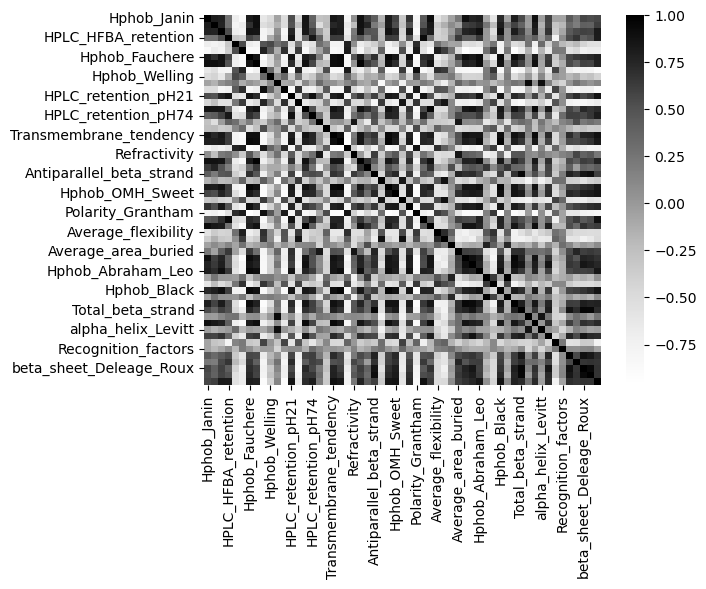

In [39]:
sb.heatmap(expasy[set(expasy.columns)-set(['AA'])].corr(),cmap='Greys')

This plot above however only gives us an initial overview on what variable(s) might be correlated. However it is still not intuitive for selection. Next we sort the values and display them along with their related variables based on absolute correlations, by excluding values of 1 (which are the correlation to themselves):

In [43]:
corr=expasy[set(expasy.columns)-set(['AA'])].corr()
corr=corr[corr!=1].stack().abs().sort_values(ascending=False)
corr

AA_composition         AA_comp_in_Swiss_Prot      0.989503
AA_comp_in_Swiss_Prot  AA_composition             0.989503
Hphob_Tanford          Hphob_Eisenberg            0.971888
Hphob_Eisenberg        Hphob_Tanford              0.971888
Hphob_Kyte_Doolittle   Hphob_Chothia              0.963024
                                                    ...   
n_codons               beta_sheet_Deleage_Roux    0.001808
HPLC_HFBA_retention    AA_composition             0.001581
AA_composition         HPLC_HFBA_retention        0.001581
                       Hphob_Eisenberg            0.000989
Hphob_Eisenberg        AA_composition             0.000989
Length: 3192, dtype: float64

We can also use a box plot to see if certain feature has significantly different values under the categorization of 0 and 1, which proves that this feature may be a good predictor for identifying whether it is an alpha helix (for values 0 and 1 in `is_alpha_helix`) or not.

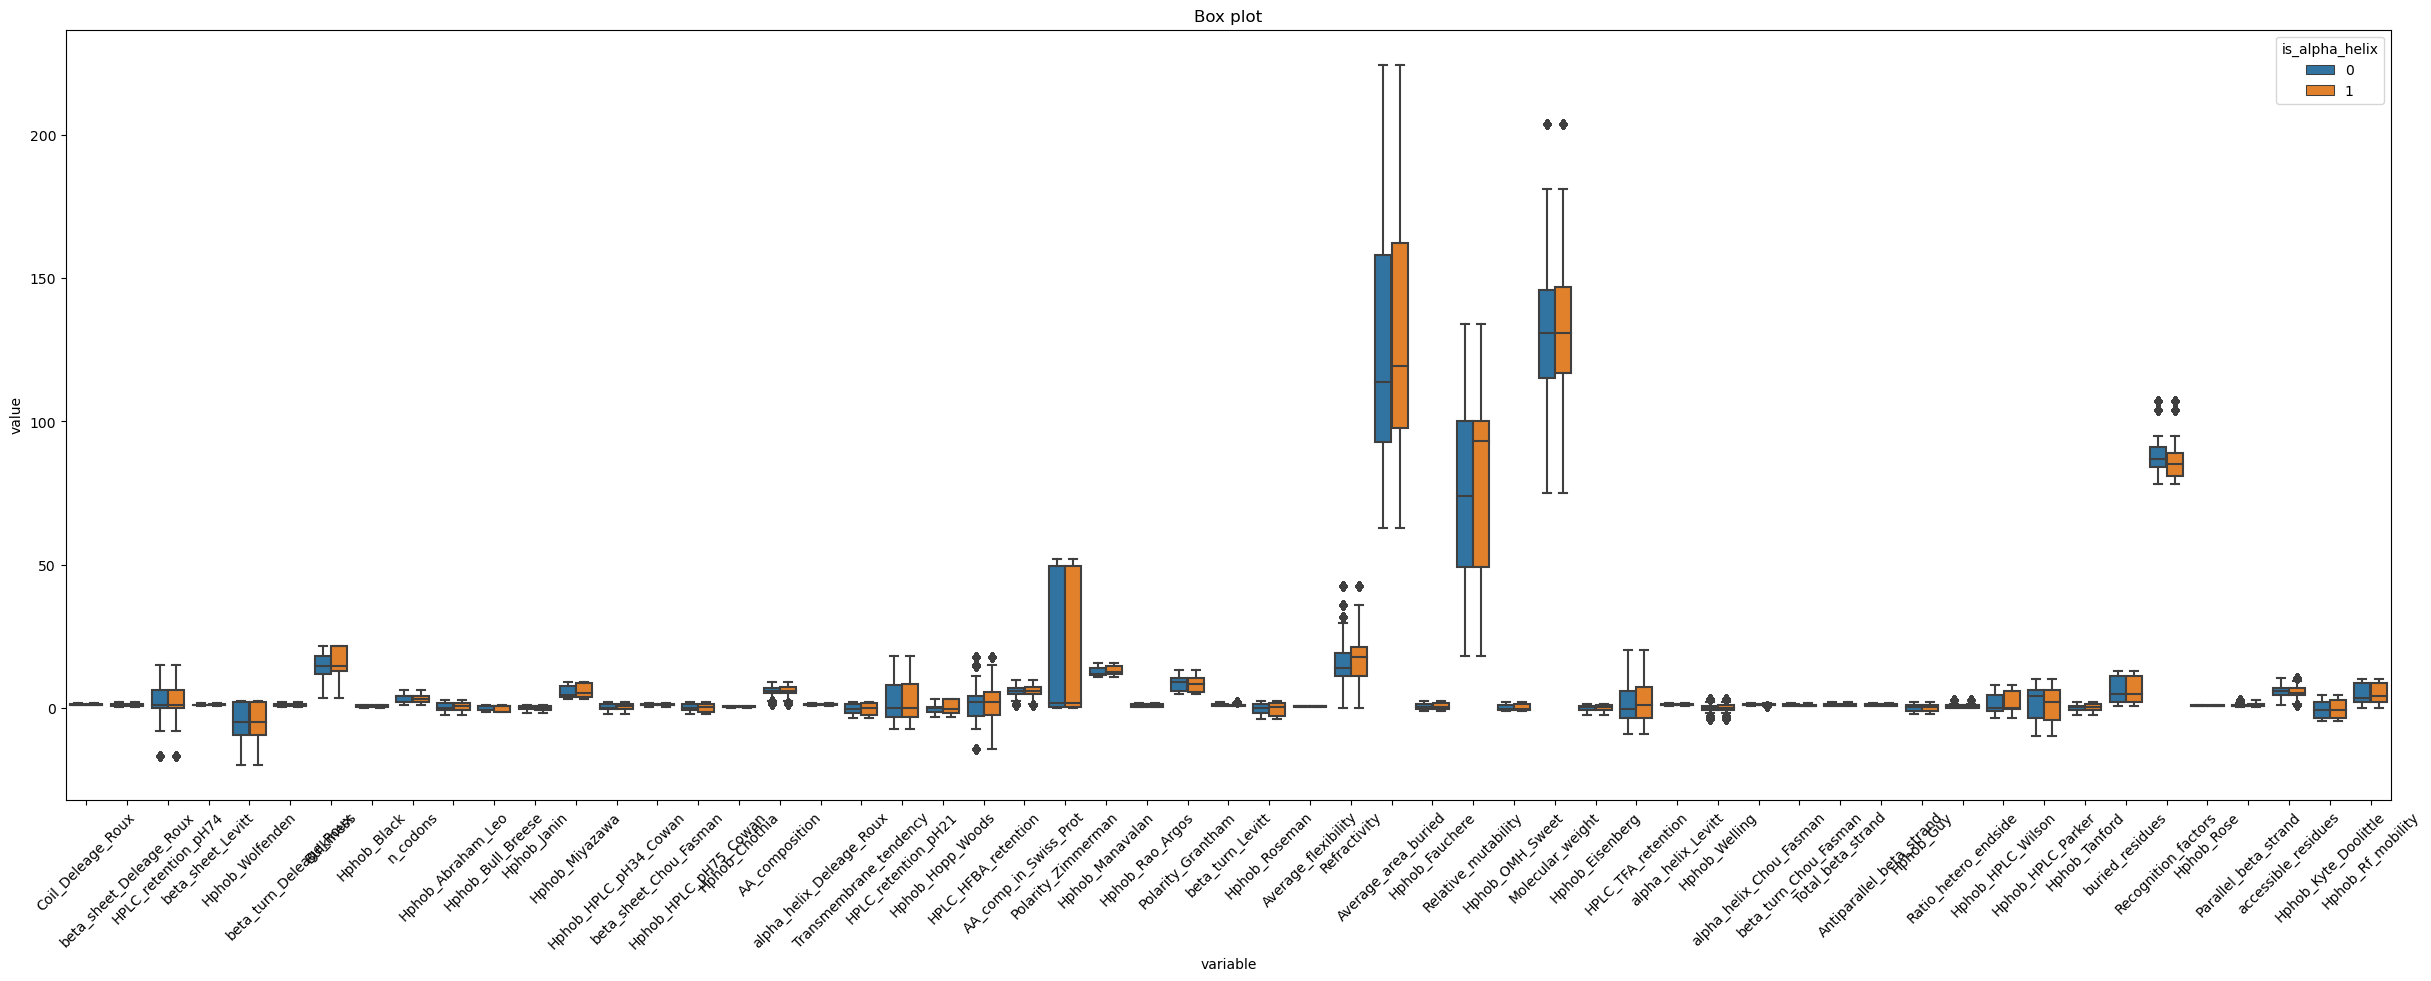

In [44]:
melted_df = final_df.melt(id_vars='is_alpha_helix', value_vars=final_df.columns[4:])
plt.figure(figsize=(30,10))
sb.boxplot(x='variable', y='value', hue='is_alpha_helix', data=melted_df)
plt.title('Box plot')
plt.xticks(rotation=45)
plt.show()

Once we find out the possible target, we can create a separated plot to kook at it more closely. For exmaple, `Hphob_Fauchere`:

Since the range varies too much in the plot and hence yields a graph that is not too good for us to observe. We do a hypothesis testing (wald test) on the meaning of each feature under condition of `is_alpha_helix`. The hypotheses are:
$$H_0:\mu_1=\mu_0\\
H_A: \mu_1\neq \mu_0$$
Afte the test we filter out and make out a dataframe of all features with corresponding p-values less than 5% (which means we reject $H_0$ that two means are the same, indicating its value differs a lot between `is_alpha_helix`=0 and `is_alpha_helix`=1)

In [64]:
htres={}
for i in final_df.columns[4:]:
    category_0 = final_df[final_df['is_alpha_helix'] == 0][i]
    category_1 = final_df[final_df['is_alpha_helix'] == 1][i]
    cm = CompareMeans.from_data(category_0, category_1)
    zstat, pval = cm.ztest_ind(alternative='two-sided')
    htres[i]={"Z-stats.":zstat,"p-value":pval}

htres=pd.DataFrame(htres).T
htres_sig=htres["p-value"]<0.05
sigftr=list(htres_sig.index) #output the significant features as a list called sigftr

htres


,Z-stats.,p-value
Coil_Deleage_Roux,32.402492,2.531583e-230
beta_sheet_Deleage_Roux,-11.505478,1.238010e-30
HPLC_retention_pH74,-1.104977,2.691693e-01
beta_sheet_Levitt,-8.116007,4.817711e-16
Hphob_Wolfenden,1.169509,2.421988e-01
beta_turn_Deleage_Roux,25.031497,2.776824e-138
Bulkiness,-18.591722,3.749452e-77
Hphob_Black,-6.524755,6.811276e-11
n_codons,5.710883,1.123918e-08
Hphob_Abraham_Leo,-10.147018,3.416426e-24


As shown above, it only filters out a little proportion of the dataset. Although we can do sorting based on the p-value, it's not meaningful because for most of them the p-values are much less than 5%. We still need to perform other kinds of feature engingeering:

We make another table `corr_df` to show the correlation of each feature with respect to variable `is_alpha_helix`:

In [66]:
corrdict={}
corrl=[]
for i in final_df[sigftr]:
    corrl.append(final_df["is_alpha_helix"].corr(final_df[i]))

corr_df=pd.DataFrame(dict(zip(final_df[sigftr], corrl)),index=["correlation"]).T
corr_df=corr_df.reindex(corr_df['correlation'].abs().sort_values(ascending=False).index)
corr_df

,correlation
alpha_helix_Deleage_Roux,0.141557
alpha_helix_Chou_Fasman,0.136732
Coil_Deleage_Roux,-0.134065
alpha_helix_Levitt,0.131028
beta_turn_Chou_Fasman,-0.125699
beta_turn_Levitt,-0.123612
beta_turn_Deleage_Roux,-0.103945
Average_area_buried,0.091220
Average_flexibility,-0.086313
Recognition_factors,-0.079110


Therefore, by the steps above, we now know the top few features with the highest correlations, not only to the response variable, but also to other features. For the later one, it implied us to combine them as one or simply choose only one of them. We can however do this simplier and better.

The steps we did above is manual calculation. Plus, we also don't know how many of the top features should we choose. We can then improve and check our answer using various different packages in python to help us do the decision. Our idea is to first determine the best number of features and can cover most original characteristics of the original data and then find those features out. Below are some machine learning processes can be for this purpose:

1. PCA to get the optimal dimension for certain proportion of features in data wanted. 
2. `SelectKBest()` from `sklearn` package to determine the features to keep.

In [122]:
# PCA:
expasy_std = StandardScaler().fit_transform(final_df.drop(["UniProt","AA","is_alpha_helix"],axis=1))
pca=PCA(n_components = 0.9) # number of component to explain 90% of the characteristics of data
expasy_pca = pca.fit_transform(expasy_std)
pca.n_components_

8

Then once we get the number of features that can cover 90% detail of the orignal dataset (6), we can use `SelectKBest()` in `sklearn` package to select our top features. Remember we reserved 2 rows for "UniProt" and "Position", so besides that we still need 6 more features to include:

In [124]:
# Substitute k=6, which is the n components we get from last question:
selector = SelectKBest(score_func=f_regression, k=pca.n_components_-2) # 2 for reserved `UniProtIdx` and `Position`

# we must contain "position" to determine AA, so we drop it here, later we will add it to our selected 6 features:
X_new = selector.fit_transform(X_train[sigftr], y_train) 

# Get the indices of the selected features
selected_features = list(X_train[sigftr].columns[selector.get_support()])
selected_features

['Coil_Deleage_Roux',
 'alpha_helix_Deleage_Roux',
 'beta_turn_Levitt',
 'alpha_helix_Levitt',
 'alpha_helix_Chou_Fasman',
 'beta_turn_Chou_Fasman']

Therefore, our top 6 features are:
- Coil_Deleage_Roux
- alpha_helix_Deleage_Roux
- beta_turn_Levitt
- alpha_helix_Levitt
- alpha_helix_Chou_Fasman
- beta_turn_Chou_Fasman

Upon this, `Position` and `UniProt` will also be included. As for UniProt we use a special way to record it, since sklearn cant handle string as label, we make an additional column in `final_df`  of a series of labels (numbers, start some 0) called `UniProtIdx` to represent `UniProt`.

In [106]:
final_df['UniProtIdx'] = pd.factorize(final_df['UniProt'])[0]
final_df

,UniProt,Position,is_alpha_helix,AA,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,...,Hphob_HPLC_Parker,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility,UniProtIdx
0,A6X980,1,0,M,0.810,1.210,4.8,0.97,-1.48,0.436,...,-4.2,0.64,1.9,80.0,0.85,1.49,1.0,1.9,8.7,0
1242,A6X980,2,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1,0
1243,A6X980,3,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1,0
5563,A6X980,4,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,...,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6,0
1244,A6X980,5,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,...,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,T0D7A2,1125,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,...,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6,132
23505,T0D7A2,1126,0,T,1.148,1.221,2.7,1.21,-4.88,0.739,...,5.2,-0.05,4.9,93.0,0.70,0.59,7.0,-0.7,3.5,132
41640,T0D7A2,1127,0,G,1.251,0.657,0.0,0.92,2.39,1.860,...,5.7,0.48,11.8,84.0,0.72,0.79,6.7,-0.4,4.1,132
26648,T0D7A2,1128,0,D,1.197,0.541,-8.2,0.72,-10.95,1.197,...,10.0,-0.09,2.9,81.0,0.62,0.50,7.7,-3.5,0.7,132


In [107]:
# Check if factorization was success:
len(final_df.UniProt.unique())==len(final_df.UniProtIdx.unique())
# Yes

True

Update the dataset:

In [126]:
all_features=selected_features
all_features.extend(["Position","UniProtIdx"])
X_train, X_test, y_train, y_test=\
    train_test_split(final_df[all_features],final_df["is_alpha_helix"],test_size=0.4)

In [128]:
X_train.head()

,Coil_Deleage_Roux,alpha_helix_Deleage_Roux,beta_turn_Levitt,alpha_helix_Levitt,alpha_helix_Chou_Fasman,beta_turn_Chou_Fasman,Position,UniProtIdx
14025,0.810,1.236,0.58,1.30,1.21,0.59,61,89
45211,0.893,1.224,0.88,0.96,0.98,0.95,261,103
32538,0.886,1.003,0.51,0.97,1.08,0.47,1065,109
19339,0.761,1.504,0.99,1.44,1.51,0.74,139,107
13064,0.810,1.236,0.58,1.30,1.21,0.59,59,58


### Model selection
Since outcome is binary, possible models for predict such a values are:
- Decision Tree
- Logistic regression
- KNN/KMeans

First we build a decision tree classifier with default hyperparam. (those will be fine-tuned later if this, decision tree is our selected model):

In [146]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train),"\n",cross_val_score(dtc, X_train, y_train, cv=5).mean(),sep="")

1.0
0.828965717606043


We get 100% accuracy for traning dataset because for a decision tree, we can always get 100% accuracy by making modes as many as enough to cover all outcomes as singletons. But this might cause overfitting. We will assess this in our future analysis. For the k-fold validation score, we got 82.93%.

Next we move to another model, logistic model, which has the following form:
$$
\ln{\left( \frac{\mathbb{P}(\verb|is_alpha_helix|=1)}{1-\mathbb{P}(\verb|is_alpha_helix|=1)} \right)=\hat{\beta} \hat{X}}
$$ , where

$$
\hat{\beta} \in \mathbb{R} ^{1 \times n}=[\beta_0, \beta_1, \cdots, \beta_n], \hat{X}\in \mathbb{R} ^{n \times 1}=[\mathbb{1}, x_1, \cdots, x_n]^T, x\text{'s are selected features}
$$

In [148]:
# Logit model:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train),"\n",cross_val_score(logreg, X_train, y_train, cv=5).mean(),sep="")

0.7675188843695526
0.7675188843695526


We got 2 similar scores for logit model, but they are both still lower than those of the decision tree classifier.

For our last model candidate, we choose K nearest neighbours:

In [154]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(knn_model.score(X_train, y_train),"\n",cross_val_score(knn_model, X_train, y_train, cv=5).mean(),sep="")

0.887013364323068
0.8003195816385823


Surprisingly, as shown above KNN has both pretty good scores, at least much better than the logit model. Note here for all 3 models above I controlled and number of folds used for k-fold validation and also didnt specify any hyperparameter rather than letting computer decide for us. We will then compare those score pairs to get our final model.

Based on the results scores given from the 3 model above, decision tree classifier seems to be a competitve candidate for us to do fine-tuning and improvement. For the fine-tuning below, we used default `cv=` of 5. There are several hyperparams. we usually fine-tune `max_depth`

### Hyperparameter Tuning
#### `max_depth`

For `max_depth`, we will use a line plot to visualize the quality of each candidate in range 2-41:

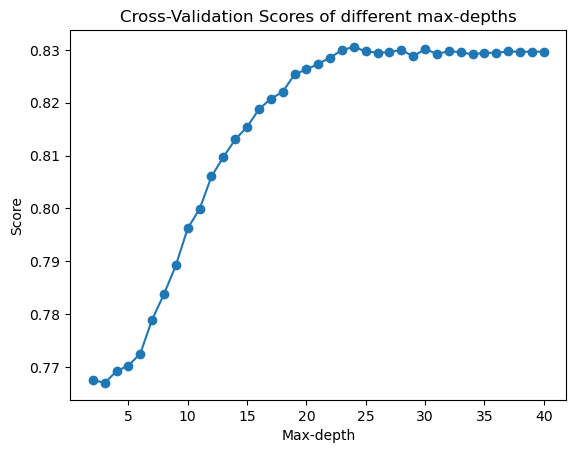

In [131]:
mdres={}
for i in range(2,41):
    clf_t = DecisionTreeClassifier(random_state=6381,max_depth=i)
    clf_t.fit(X_train, y_train)
    mdres[i]=cross_val_score(clf_t, X_train, y_train, cv=5).mean()

plt.plot(mdres.keys(), mdres.values(), marker='o', linestyle='-')
plt.title('Cross-Validation Scores of different max-depths')
plt.xlabel('Max-depth')
plt.ylabel('Score')
plt.show()

As shown above,when max-depth=24, model yields highest 5-fold validation score. (You can also check by see the value in `mdres`) So our model is a decision tree model with a max depth of 24. 

#### `min_samples_split`
This is the minimum number of samples required to split an internal node. Increasing this parameter can lead to a simpler model with less splitting, which may help prevent overfitting. I will tune this hyperparameter based on the similar method as the previous one, but in the range 2~11:

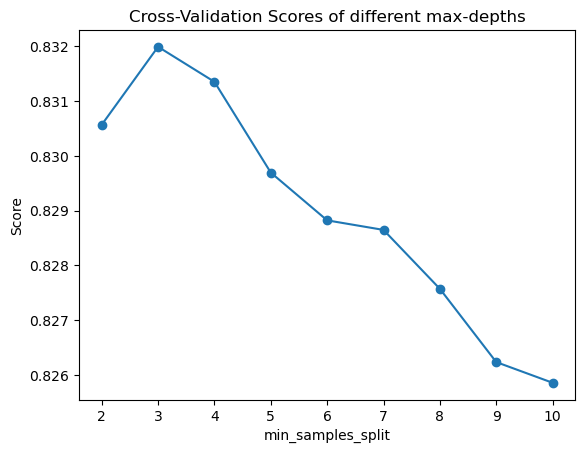

In [157]:
mssres={}
for i in range(2,11):
    clf_s = DecisionTreeClassifier(random_state=6381,max_depth=24,min_samples_split=i) #plug in the optimal max-depth got previously
    clf_s.fit(X_train, y_train)
    mssres[i]=cross_val_score(clf_s, X_train, y_train, cv=5).mean()

plt.plot(mssres.keys(), mssres.values(), marker='o', linestyle='-')
plt.title('Cross-Validation Scores of different max-depths')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.show()

As shown above, it's quite obvious to see the pattern of dropping for min_samples_split>3. So the optimal value of `min_samples_split` should be 3. 
I will not demonstrate more hyperparam. tunings here due to the length concern, but they should be actually all the same as above. 

## Results & Evaluation
Once we have the optimal hyperparams., we can get our final model to see results & do evaluations:
### Retrain:

In [165]:
dtf = DecisionTreeClassifier(max_depth=24,min_samples_split=3) #plug in the optimal hyperparams. got previously
dtf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=24, min_samples_split=3)

### Assessment (ROC curve and AUC)

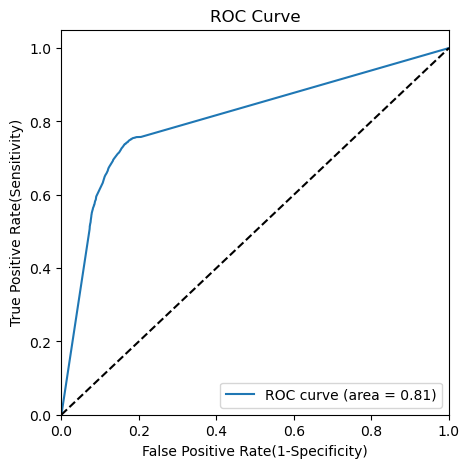

In [166]:
y_pred = dtf.predict(X_test)
y_prob = dtf.predict_proba(X_test)[:, 1]

# plotting roc curve:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

As shown above, we got a decent ROC curve with a quite good AUC value of 0.81 (`area=` in the legend in the plot), which means that if one randomly selects a positive instance and a negative instance, the model's probability of assigning a higher score to the positive instance is 0.81.

But it's worth noticing that indicates that for the ending part of my ROC curve I got a straight upward line instead of a curve. This might be telling us the model is making perfect predictions in that region, which is likely a sign of overfitting or a perfect separation of the classes. This might be a future improvement direction.

## Model Persistence
Save final model as a `pickle` file:

In [162]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(dtf, file)